In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

# Display Colonnes Pandas :
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting infos with googlemap api

### Infos, doc, and usefull links

- list of the googlemap apis : https://developers.google.com/maps/apis-by-platform
- Getting started with googlmaps platform : https://developers.google.com/maps/gmp-get-started
- Place API doc : https://developers.google.com/maps/documentation/places/web-service/search
- Nice tutorial for Place API usage : https://www.tomordonez.com/google-maps-api-python/
- Google maps python package : https://pypi.org/project/googlemaps/


- How to configure the API key : https://developers.google.com/maps/documentation/places/web-service/get-api-key

In [8]:
import googlemaps

In [14]:
## Initialisation of a googlemap object with the api_key
gmaps = googlemaps.Client(key=api_key)

In [29]:
dublin_lat = 53.2923
dublin_lon = -6.2677
dublin_center_coords = (53.2923, -6.2677)
radius = 10000
# place = gmaps.find_place(input="bar", 
#                          input_type="textquery", 
#                          fields=["name", "formatted_address"], 
#                          location_bias=f"circle:{radius}@{dublin_lat},{dublin_lon}", language="en")

### Geographical regions

#### Test

In [3]:
from slcities.coordinates import generate_region_around_center, create_coordinate_matrix, get_4_region_coordinates, compute_haversine_distances

In [4]:
center_coords = (53.350145, -6.266155)
NO_coords, SE_coords = generate_region_around_center(center_coords, width=1000, height=2000)
print(NO_coords, SE_coords)

(53.359130060063485, -6.273664896297422) (53.3411594539808, -6.258648261312714)


In [5]:
NO_coords, NE_coords, SO_coords, SE_coords = get_4_region_coordinates(NO_coords, SE_coords)
print(NO_coords, NE_coords, SO_coords, SE_coords)

(53.359130060063485, -6.273664896297422) (53.359130060063485, -6.258648261312714) (53.3411594539808, -6.273664896297422) (53.3411594539808, -6.258648261312714)


In [11]:
compute_haversine_distances(NO_coords, SO_coords)

1998.242985209182

In [12]:
compute_haversine_distances(NO_coords, NE_coords)

996.5179078829666

> Both distance ~ correspond to the input dimensions (eg. width = 1000, height=2000 )

### Get places within a region

#### Draw the region

In [3]:
from slcities.coordinates import generate_region_around_center, create_coordinate_matrix
from slcities.params import DUBLIN_CENTER_COORDS

In [4]:
## creating 100 points (10^2) in a 4 km^2 square around the center
region_dim = 2000
nb_ticks = 2
region_width = region_height = region_dim

NO_coords, SE_coords = generate_region_around_center(DUBLIN_CENTER_COORDS, width=region_width, height=region_height)
coordinates_matrix = create_coordinate_matrix(NO_coords, SE_coords, nb_ticks=nb_ticks)

In [61]:
coordinates_matrix

[(53.359124351379386, -6.281174790670693),
 (53.359124351379386, -6.251141524547453),
 (53.34115374563247, -6.281174790670693),
 (53.34115374563247, -6.251141524547453)]

#### Define the radius for area bias parameter

In [34]:
def compute_radius_for_evenly_distributed_circle(dim, nb_ticks, prop_overlap=0.1):
    """
    Compute the circle radius value with a defined overlap for evenly distributed circles.
    
    if prop_overlap = 0, the sum of the diameters (2*radius) = the dim value i.e case where circles are adjacent.
    if prop overlap < 0, the circles defined by the radius will not overlap 
    if prop overlap > 0, the circles defined by the radius will overlap 
    
    Parameters :
    ------------
    dim (numeric) -- the axis measure
    nb_ticks (int) -- the number of ticks (e.g. points/circle centers) along the axis
    prop_overlap (float) -- the desired proportion of overlap. Must be > -1 and < 1
    
    
    Returns :
    ---------
    (float) -- the radius value (same unit as the dim parameter"""
    return (region_dim/nb_ticks/2) + (region_dim/nb_ticks/2)*prop_overlap

In [56]:
prop_overlap = 0.1
radius = compute_radius(region_dim, nb_ticks, prop_overlap=prop_overlap)
radius

550.0

#### API request

nearby search API doc : https://developers.google.com/maps/documentation/places/web-service/search-nearby

available places types : https://developers.google.com/maps/documentation/places/web-service/supported_types
<br> results fields place api : https://developers.google.com/maps/documentation/places/web-service/place-data-fields

https://towardsdatascience.com/how-to-use-the-google-places-api-for-location-analysis-and-more-17e48f8f25b1

quartier_residenciel = ['atm', 'bakery', 'bar', 'city_hall', 'doctor', 'night_club', 'park', 'pharmacy', 'primary_school', 'shopping_mall', 'supermarket']
<br>quartier_desert = ['aquarium', 'airport', 'car_dealer', 'rv_park', 'zoo']

In [6]:
gmaps = googlemaps.Client(key=api_key)

In [100]:




lst_place_types = ['bar', 'restaurant', 'casino', 'night_club']

optional = ['atm', 'liquor_store', 'park', 'parking', 'subway_station', 
            'bus_station', 'train_station','taxi_stand', 'tourist_attraction',
           'gas_station']
machin = ['atm', 'bakery', 'bar', 'city_hall', 'doctor', 'night_club', 'park', 'pharmacy', 'primary_school', 'shopping_mall', 'supermarket']

places_types = list(set(lst_place_types+optional+machin))


In [101]:
places_types

['night_club',
 'bus_station',
 'parking',
 'bakery',
 'atm',
 'doctor',
 'liquor_store',
 'supermarket',
 'subway_station',
 'restaurant',
 'gas_station',
 'casino',
 'taxi_stand',
 'train_station',
 'bar',
 'tourist_attraction',
 'primary_school',
 'city_hall',
 'shopping_mall',
 'park',
 'pharmacy']

In [99]:
lst_place_types+optional

['bar',
 'restaurant',
 'casino',
 'night_club',
 'atm',
 'liquor_store',
 'park',
 'parking',
 'subway_station',
 'bus_station',
 'train_station',
 'taxi_stand',
 'tourist_attraction',
 'gas_station']

In [131]:



# res = gmaps.places_nearby(location=DUBLIN_CENTER_COORDS, 
#                           radius=300,
#                           type=places_types,
#                           rank_by = 'distance',
#                           language="en")

# res = gmaps.places_nearby(location=DUBLIN_CENTER_COORDS, 
#                           type='laundry',
#                           rank_by = 'distance',
#                           language="en")
res = gmaps.places_nearby(location=DUBLIN_CENTER_COORDS, 
                          radius=3000,
                          type='laundry',
                          language="en")

# A voir : est ce qu'il y a des buisness_status CLOSED_TEMPORARILY

In [8]:
# def api_call_place_nearby_rankby_prominence(maps_client, location, radius, place_types, time_sleep=3):
#     """
#     Inspired by : https://github.com/googlemaps/google-maps-services-python/issues/376
#     """
#     list_results = []
#     result = gmaps.places_nearby(location=location ,
#                                  radius=radius,
#                                  type = place_types,
#                                  language = 'en')
#     list_results.extend(result['results'])
#     while 'next_page_token' in result.keys():
#         time.sleep(time_sleep)
#         result = gmaps.places(page_token= result['next_page_token'])
#         list_results.extend(result['results'])
#     return pd.json_normalize(list_results)

# res = api_request_place_nearby_rankby_prominence(gmaps, DUBLIN_CENTER_COORDS, 300, places_types, time_sleep=2)
# ## idée : sauvegarder le resultat de chaque call séparement avec une trace du call qui a été fait pour eviter les coupures intepéstives
    

In [7]:
import googlemaps
# https://www.datacourses.com/transform-json-into-a-dataframe-416/
# https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8
# https://googlemaps.github.io/google-maps-services-python/docs/
# https://github.com/googlemaps/google-maps-services-python/issues/376
import time
from pandas.io.json import json_normalize

from slcities.params import API_CALL_COLUMNS_OF_INTEREST

In [99]:
def get_apy_key_from_file(file_path):
    """
    Read and return the api key from a file
    
    Parameters : 
    ------------
    file_path (str) -- the path of the file containing the API KEY
    
    Returns :
    ---------
    (str) -- the api key as a string.
    """
    with open(api_key_file) as f:
        api_key=f.readline()
        api_key=api_key.strip()
    return api_key


def api_call_place_nearby_rankby_distance(maps_client, location, place_types, time_sleep=3):
    """
    Inspired by : https://github.com/googlemaps/google-maps-services-python/issues/376
    """
    list_results = []
    result = gmaps.places_nearby(location=location ,
                                 type = place_types,
                                 rank_by='distance',
                                 language = 'en')
    list_results.extend(result['results'])
    while 'next_page_token' in result.keys():
        time.sleep(time_sleep)
        result = gmaps.places(page_token= result['next_page_token'])
        list_results.extend(result['results'])
    return pd.json_normalize(list_results)

# def drop_columns(df, lst_columns):
#     """
#     Drop the df's columns specified in lst_columns
    
#     Parameters :
#     ------------
#     df (pandas dataframe) -- the input pandas dataframe
#     lst_columns (list of string) -- the list of the columns to drop.    
    
#     Returns : 
#     ---------
#     (pandas dataframe) -- the resulting dataframe
#     """
#     return df.drop(columns=lst_columns)

def remove_rows_with_condition_on_columns(df, column, lst_values, remove=True):
    """
    Filter dataframe to retain/exclude rows based on a set of values for a specific columns
    
    Parameters :
    ------------
    df (pandas dataframe) -- the input pandas dataframe
    column (string) -- the column to use for filtering
    lst_values (list of str) -- the column values used as a criterion to exclude/retain rows
    retain (bool) -- if False (default), only rows for wich the column value is not in lst_values will be retained
    Else, these rows will be excluded.
    
    Returns : 
    ---------
    (pandas dataframe) -- the resulting dataframe
    """
    if remove:
        df = df.loc[~df[column].isin(lst_values)]
    else:
        df = df.loc[df[column].isin(lst_values)]
    return df



def get_df_subset_columns(df, lst_columns, retain=True):
    """
    Filter dataframe to only retain/exclude the columns specified in lst_columns
    
    Parameters :
    ------------
    df (pandas dataframe) -- the input pandas dataframe
    lst_columns (list of string) -- the list of the columns of interest
    retain (bool) -- if true, only columns specified in lst_columns will be retained
    Else, these columns will be excluded.
    
    Returns : 
    ---------
    (pandas dataframe) -- the resulting dataframe
    """
    if retain:
        df = df.loc[:, df.columns.isin(lst_columns)]
    else:
        df = df.loc[:, ~df.columns.isin(lst_columns)]
    return df

def transform_lst_of_values_column_into_string(df, column, sep='|'):
    """
    Transform list stored in a column into string
    
    Parameters :
    ------------
    df (pandas dataframe) -- the input pandas dataframe
    column (str) -- the name of the columns of interest
    sep (str) -- the separator to use when joining the list elements
    
    Returns : 
    ---------
    (pandas dataframe) -- the resulting dataframe
    """
    df[column] = df[column].apply(f'{sep}'.join)
    return df

def add_a_column_with_single_value(df, column_name, value):
    """
    Add a column to a dataframe with a defined value for all the rows
    
    Parameters :
    ------------
    df (pandas dataframe) -- the input pandas dataframe
    column_name (str) -- the name of the columns to create
    value (str) -- the value to set for the whole column
    
    Returns : 
    ---------
    (pandas dataframe) -- the resulting dataframe
    """
    df[column_name]=value
    return df


def clean_and_format_API_call_results_for_exportation(df, interest_col_lst, place_type):
    ## Remove the rows where 'permanently_closed' == True, i.e the shops that are no 
    ## longuer existing
    df = remove_rows_with_condition_on_columns(df, 'permanently_closed', [True], remove=True)
    
    ## Drop columns from the dataframe to only retain the ones specified in interest_col_lst
    df = get_df_subset_columns(df, interest_col_lst, retain=True)
    
    ## Transform the list of types in the 'types' column into a string where each type is separated 
    ## from the other with a defined separator
    df = transform_lst_of_values_column_into_string(df, 'types', sep='|')
    
    ## Add a tag column for which the value is the type used for the API call (place_type)
    df = add_a_column_with_single_value(df, 'main_type', main_type)
    
    return df

def generate_api_call_file_name(location, place_type, extension='tsv'):
    """
    Generate a file name corresponding to an API call
    
    Parameters :
    ------------
    location (tuple) -- the location coordinates (lat, lon)
    place_type (str) -- the type of place we are looking for in the
    API call
    extension (str) -- the file name extension
    
    Returns : 
    ---------
    (str) -- the file name
    """
    return f'APIcall_lat{location[0]}_lon{location[1]}_{place_type}.{extension}'


def save_api_call(df, dir_path, f_name, sep='\t'):
    """
    Store the results of the API call in a file
    
    Parameters :
    ------------
    df (pandas dataframe) -- the input pandas dataframe
    dir_path (str) -- the output directory path
    f_name (str) -- the file name
    sep (str) -- the column separator to use

    """
    path = os.path.join(dir_path, f_name)
    df.to_csv(path, sep=sep)
    
    

def read_api_call():
    
    
    
    
    






# we select the columns of interest while saving the results. Hence, the tables already are formated when re-inporting for merging. 
# (API call ouput df  can have different shapes


def save_api_call(dir_path, df, lst_columns, location, place_type):
    f_name = dsqd
    

In [141]:
test2 = api_call_place_nearby_rankby_distance(gmaps, (53.36361581301013, -6.288687055273128), 'rv_park', time_sleep=2)

0

In [5]:
api_key_file = '/home/djampa/other/gmap_api_key.txt'


In [70]:
# res = api_request_place_nearby_rankby_prominence(gmaps, DUBLIN_CENTER_COORDS, 50000, ['casino'], time_sleep=3)
res = api_request_place_nearby_rankby_distance(gmaps, DUBLIN_CENTER_COORDS, ['bar'], time_sleep=2)
res['place_id'].unique().shape

(60,)

In [91]:
API_CALL_COLUMNS_OF_INTEREST = ['business_status', 'name', 'permanently_closed', 'place_id', 'types', 'geometry.location.lat', 'geometry.location.lng', 'price_level', 'opening_hours.open_now',
       'formatted_address']

In [94]:
res2 = filter_df_columns(res, API_CALL_COLUMNS_OF_INTEREST, retain=True)
res2.columns

Index(['business_status', 'name', 'permanently_closed', 'place_id', 'types',
       'geometry.location.lat', 'geometry.location.lng', 'price_level',
       'opening_hours.open_now', 'formatted_address'],
      dtype='object')

In [95]:
res2.head(3)

,business_status,name,permanently_closed,place_id,types,geometry.location.lat,geometry.location.lng,price_level,opening_hours.open_now,formatted_address
0,CLOSED_TEMPORARILY,Dublin Beer Factory,True,ChIJ-U7osBUPZ0gRV4DQLlrF1Lk,"[tourist_attraction, bar, food, point_of_inter...",53.350733,-6.266781,NaN,NaN,NaN
1,OPERATIONAL,Woolshed Baa & Grill,NaN,ChIJEff8I4IOZ0gRa3Aap96eX9g,"[bar, restaurant, food, point_of_interest, est...",53.350270,-6.267417,2.0,False,NaN
2,OPERATIONAL,"The Church Café, Late Bar & Restaurant",NaN,ChIJtTOXRIIOZ0gRiLAbrd61jVs,"[bar, tourist_attraction, cafe, restaurant, fo...",53.348639,-6.266711,2.0,False,NaN


In [98]:
res2.head(3).permanently_closed.value_counts()

True    1
Name: permanently_closed, dtype: int64

In [101]:
res3 = remove_rows_with_condition_on_columns(res2.head(3), 'permanently_closed', [True], remove=True)

In [102]:
res3

,business_status,name,permanently_closed,place_id,types,geometry.location.lat,geometry.location.lng,price_level,opening_hours.open_now,formatted_address
1,OPERATIONAL,Woolshed Baa & Grill,NaN,ChIJEff8I4IOZ0gRa3Aap96eX9g,"[bar, restaurant, food, point_of_interest, est...",53.350270,-6.267417,2.0,False,NaN
2,OPERATIONAL,"The Church Café, Late Bar & Restaurant",NaN,ChIJtTOXRIIOZ0gRiLAbrd61jVs,"[bar, tourist_attraction, cafe, restaurant, fo...",53.348639,-6.266711,2.0,False,NaN


In [113]:
res3.loc[:,'types'] = res3.types.apply('|'.join)

In [127]:
res3.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_status         2 non-null      object 
 1   name                    2 non-null      object 
 2   permanently_closed      0 non-null      object 
 3   place_id                2 non-null      object 
 4   types                   2 non-null      object 
 5   geometry.location.lat   2 non-null      float64
 6   geometry.location.lng   2 non-null      float64
 7   price_level             2 non-null      float64
 8   opening_hours.open_now  2 non-null      object 
 9   formatted_address       0 non-null      object 
dtypes: float64(3), object(7)
memory usage: 288.0+ bytes


In [71]:
test = res['results'][1]
test

{'business_status': 'OPERATIONAL',
 'geometry': {'location': {'lat': 53.3515784, 'lng': -6.263015100000001},
  'viewport': {'northeast': {'lat': 53.35275358029149,
    'lng': -6.261980519708498},
   'southwest': {'lat': 53.35005561970849, 'lng': -6.264678480291503}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
 'icon_background_color': '#909CE1',
 'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
 'name': 'Jurys Inn Parnell Street Dublin',
 'opening_hours': {'open_now': True},
 'photos': [{'height': 2448,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/105455543357719892855">Fren Salieri</a>'],
   'photo_reference': 'Aap_uEB4aA8sZ_hhuL8SFTs4tStg_qFqmbqK0e93H9g9OhxCQb-NnNhYyl36vgS6bczu4Y18tv7jsSj-DX1iJ6rveGKk90Psw4Lh7YbVrGn4sFuXdIPEdOHz6f5VDEOroiI7_y0x79HlgULZt5pb_564b2R3_AgFGV6I1YJpAlEicLHKgM4G',
   'width': 3264}],
 'place_id': 'ChIJ3QI1TIEOZ0gRJmESP7v_4hI',
 'plus_code': {'com

In [76]:
test.keys()

dict_keys(['business_status', 'geometry', 'icon', 'icon_background_color', 'icon_mask_base_uri', 'name', 'opening_hours', 'photos', 'place_id', 'plus_code', 'rating', 'reference', 'scope', 'types', 'user_ratings_total', 'vicinity'])

In [82]:
# results fiels explanation :https://developers.google.com/maps/documentation/places/web-service/details#fields
# available places types : https://developers.google.com/maps/documentation/places/web-service/supported_types
included_keys = ['place_id', 'geometry', 'types', 'name', 'business_status', 'opening_hours', 'rating']
test_json = {k:v for k,v in test.items() if k in included_keys}

In [83]:
test_dict

{'business_status': 'OPERATIONAL',
 'geometry': {'location': {'lat': 53.3515784, 'lng': -6.263015100000001},
  'viewport': {'northeast': {'lat': 53.35275358029149,
    'lng': -6.261980519708498},
   'southwest': {'lat': 53.35005561970849, 'lng': -6.264678480291503}}},
 'name': 'Jurys Inn Parnell Street Dublin',
 'opening_hours': {'open_now': True},
 'place_id': 'ChIJ3QI1TIEOZ0gRJmESP7v_4hI',
 'rating': 4.1,
 'types': ['lodging',
  'restaurant',
  'food',
  'point_of_interest',
  'establishment']}

In [86]:
# df_nested_list = pd.json_normalize(data, record_path =['students'])
df_nested_list = pd.json_normalize(test)
df_nested_list

,business_status,icon,icon_background_color,icon_mask_base_uri,name,photos,place_id,rating,reference,scope,...,vicinity,geometry.location.lat,geometry.location.lng,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,opening_hours.open_now,plus_code.compound_code,plus_code.global_code
0,OPERATIONAL,https://maps.gstatic.com/mapfiles/place_api/ic...,#909CE1,https://maps.gstatic.com/mapfiles/place_api/ic...,Jurys Inn Parnell Street Dublin,"[{'height': 2448, 'html_attributions': ['<a hr...",ChIJ3QI1TIEOZ0gRJmESP7v_4hI,4.1,ChIJ3QI1TIEOZ0gRJmESP7v_4hI,GOOGLE,...,"Plaza, Moore Street, Dublin",53.351578,-6.263015,53.352754,-6.261981,53.350056,-6.264678,True,"9P2P+JQ Dublin, County Dublin, Ireland",9C5M9P2P+JQ


In [81]:
df_nested_list

,business_status,name,rating,reference,scope,types,user_ratings_total,vicinity,geometry.location.lat,geometry.location.lng,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,opening_hours.open_now
0,OPERATIONAL,Jurys Inn Parnell Street Dublin,4.1,ChIJ3QI1TIEOZ0gRJmESP7v_4hI,GOOGLE,"[lodging, restaurant, food, point_of_interest,...",2022,"Plaza, Moore Street, Dublin",53.351578,-6.263015,53.352754,-6.261981,53.350056,-6.264678,True


In [ ]:
lst_place_types = ['bar', 'restaurant', 'casino', 'night_club']

optional = ['atm', 'liquor_store', 'park', 'parking', 'subway_station', 
            'bus_station', 'train_station','taxi_stand', 'tourist_attraction',
           'gas_station']



## Initialisation of a googlemap object with the api_key
gmaps = googlemaps.Client(key=api_key)
# nb_places = gmaps.places_nearby(location=dublin_center_coords, radius=5000, keyword="startup", language="en")
dublin_bar_5kmrad = gmaps.places_nearby(location=dublin_center_coords, 
                                        radius=200, type=['bar', 'restaurant', 'casino'], 

                                        language="en")

TypeError: places_nearby() got an unexpected keyword argument 'locality'

In [53]:
coordinates_matrix

[(53.359124351379386, -6.281174790670693),
 (53.359124351379386, -6.277837761101445),
 (53.359124351379386, -6.2745007315321955),
 (53.359124351379386, -6.271163701962947),
 (53.359124351379386, -6.2678266723936975),
 (53.359124351379386, -6.264489642824449),
 (53.359124351379386, -6.2611526132552),
 (53.359124351379386, -6.257815583685951),
 (53.359124351379386, -6.254478554116702),
 (53.359124351379386, -6.251141524547453),
 (53.35712761740751, -6.281174790670693),
 (53.35712761740751, -6.277837761101445),
 (53.35712761740751, -6.2745007315321955),
 (53.35712761740751, -6.271163701962947),
 (53.35712761740751, -6.2678266723936975),
 (53.35712761740751, -6.264489642824449),
 (53.35712761740751, -6.2611526132552),
 (53.35712761740751, -6.257815583685951),
 (53.35712761740751, -6.254478554116702),
 (53.35712761740751, -6.251141524547453),
 (53.35513088343563, -6.281174790670693),
 (53.35513088343563, -6.277837761101445),
 (53.35513088343563, -6.2745007315321955),
 (53.35513088343563, -6

### API CALL data cleaning

In [1]:
import pandas as pd
import numpy as np
import os

from slcities.params import PLACES_TYPES_DISCRIMINANT_SET



%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None) # Display Colonnes Pandas

#### Files listing

In [2]:
input_dir = '/home/djampa/code/data_project_lewagon/slcities/slcities/intermediate_data/places_api_call/27-08-2021_00-07-56'

In [3]:
def list_files_in_dir(dir_path):
    """
    list files in a directory
    
    Parameters : 
    ------------
    dir_path (str) -- The directory where the files are located

    Returns :
    ---------
    (list of str) -- The list of the files names.
    """
    return os.listdir(dir_path)

def filter_filenames(lst_fnames, suffix='.tsv', prefix=None):
    """
    Filter filenames according to a suffix/extension and optionally a prefix.
    
    Parameters :
    ------------
    lst_fnames (list of str) -- A list of files names. 
    suffix (str) -- the suffix/extension to look for in a file name. 
    Only the files with this suffix will be returned.
    prefix (str) -- (optional; default=None) if specified, only files with 
    this suffix will be returned (in addition to the suffix condition)

    Returns :
    ---------
    (list of str) -- The list of the filtered files names.
    """
    if prefix is None:
        filenames = [f_name for f_name in lst_fnames if f_name.endswith(suffix)]
    else:
        filenames = [f_name for f_name in lst_fnames if f_name.endswith(suffix) and f_name.startswith(prefix)]
    return filenames

def get_files_absolute_path(dir_path, lst_fnames):
    """
    Generate files absolute paths.
    
    Parameters : 
    ------------
    dir_path (str) -- The directory where the files are located
    lst_fnames (list of str) -- A list of files names. 
    
    Returns :
    ---------
    (list of str) -- The list of the files absolute paths.
    """
    return [os.path.join(dir_path, f_name) for f_name in lst_fnames]

def get_fpath_of_API_call_results(input_dir):
    filenames = list_files_in_dir(input_dir)
    filenames = filter_filenames(filenames, suffix='.tsv', prefix='APIcall')
    return get_files_absolute_path(input_dir, filenames)
    
####-----------------------------------------------------------####
####-----------------------------------------------------------####

lst_columns_to_use = ['place_id', 'main_type', 'types', 'geometry.location.lat',
       'geometry.location.lng']
    
def open_api_call_to_pandas_dataframe(f_path, lst_columns=None, sep='\t'):
    if lst_columns is None:
        df = pd.read_csv(f_path, sep=sep)
    else:
        df = pd.read_csv(f_path, sep=sep, usecols=lst_columns)
    return df

def open_api_calls_res_as_a_single_df(lst_fpaths, lst_columns_to_use, sep='\t'):
    lst_api_call_df = []
    for f_path in lst_fpaths:
        lst_api_call_df.append(open_api_call_to_pandas_dataframe(f_path, 
                                                        lst_columns=lst_columns_to_use, 
                                                        sep='\t'))
    return pd.concat(lst_api_call_df)

####-----------------------------------------------------------####
####-----------------------------------------------------------####

def clean_duplicated_places(df):
    """
    NB : No need to sort first. It does not speed up the 
    duplicates research. On the contrary.
    """
    return df.drop_duplicates(ignore_index=True) 



def create_location_var_from_separate_coords(df):
    """
    """
    ## create a new 'location' variable as a tuple of ('geometry.location.lat', 'geometry.location.lng')
    ##  https://stackoverflow.com/questions/16031056/how-to-form-tuple-column-from-two-columns-in-pandas
    df['location'] = list(zip(df['geometry.location.lat'], 
                              df['geometry.location.lng']))
    ## drop 'geometry.location.lat' 'geometry.location.lng' columns
    df = df.drop(columns=['geometry.location.lat', 'geometry.location.lng'])
    return df

def transform_places_types_var(df):
    df['types'] = df['types'].apply(lambda x: x.split('|'))
    return df

# All tthe 2nd orders types
# ['point_of_interest', 'establishment', 'bicycle_store', 'book_store', 'campground', 'dentist', 'finance',
#        'food', 'general_contractor', 'grocery_or_supermarket', 'health',
#        'home_goods_store', 'library', 'local_government_office',
#        'meal_delivery', 'meal_takeaway', 'movie_rental', 'painter',
#        'physiotherapist', 'roofing_contractor', 'shoe_store', 'store',
#        'tourist_attraction', 'travel_agency', 'university']




# def filter_types_list_according_to_type_order(lst, order=1):
#     if order == 1:
#         res = [x for x in lst if x in PLACES_TYPES_DISCRIMINANT_SET]
#     else:
#         res = [x for x in lst if x not in PLACES_TYPES_DISCRIMINANT_SET and x not in ['point_of_interest', 'establishment']]
#     return res

def filter_types_list_according_to_type_order(lst, order=1):
    authorised_second_order_types_lst = [
       'food', 'grocery_or_supermarket', 'health',
       'home_goods_store', 'local_government_office',
        'store']
    if order == 1:
        res = [x for x in lst if x in PLACES_TYPES_DISCRIMINANT_SET]
    else:
        res = [x for x in lst if x not in PLACES_TYPES_DISCRIMINANT_SET and x in authorised_second_order_types_lst]
    return res

#### Files listing

In [4]:
filespaths = get_fpath_of_API_call_results(input_dir)
print(filespaths[3])
len(filespaths)

/home/djampa/code/data_project_lewagon/slcities/slcities/intermediate_data/places_api_call/27-08-2021_00-07-56/APIcall_lat53.344011516469145_lon-6.284591609699919_restaurant.tsv


6624

#### File opening

In [5]:
api_calls_df = open_api_calls_res_as_a_single_df(filespaths, 
                                                 lst_columns_to_use, 
                                                 sep='\t')
api_calls_df.head(3)

,place_id,types,geometry.location.lat,geometry.location.lng,main_type
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,doctor|health|point_of_interest|establishment,53.349314,-6.244549,doctor
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,doctor|health|point_of_interest|establishment,53.349484,-6.244851,doctor
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,doctor|health|point_of_interest|establishment,53.349517,-6.245639,doctor


In [6]:
api_calls_df.shape

(296635, 5)

#### Cleaning true duplicates

The idea here is to drop duplicated rows (i.e the exact same lines). This duplicated rows are due to the way we did the API call. We picked location in a grid and did a research of the places from certain types nearby this points. Hence, the same place can happen to be found in adjacent points of the grid.

In [7]:
no_dupl_api_calls_df = clean_duplicated_places(api_calls_df.copy())
no_dupl_api_calls_df.shape

(11030, 5)

In [8]:
len(np.unique(no_dupl_api_calls_df.place_id))

8084

> Several rows correspond to the same place, probably because these places are associated to several types.

#### A bit of data engenering

##### Create a location var from separated lat and lon

In [9]:
tmp1_df = no_dupl_api_calls_df.copy()
tmp1_df = create_location_var_from_separate_coords(tmp1_df)
tmp1_df.head(2)

,place_id,types,main_type,location
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,doctor|health|point_of_interest|establishment,doctor,"(53.349314, -6.244549)"
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,doctor|health|point_of_interest|establishment,doctor,"(53.34948410000001, -6.244851199999999)"


##### transform the types column from string to list

In [28]:
tmp2_df=transform_places_types_var(tmp1_df)
tmp2_df.head(2)

,place_id,types,main_type,location
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,"[doctor, health, point_of_interest, establishm...",doctor,"(53.349314, -6.244549)"
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,"[doctor, health, point_of_interest, establishm...",doctor,"(53.34948410000001, -6.244851199999999)"


##### Analyse types in types lst

In [29]:
type_in_types_lst_cnt = pd.DataFrame([x for l in tmp2_df['types'] for x in l]).value_counts()

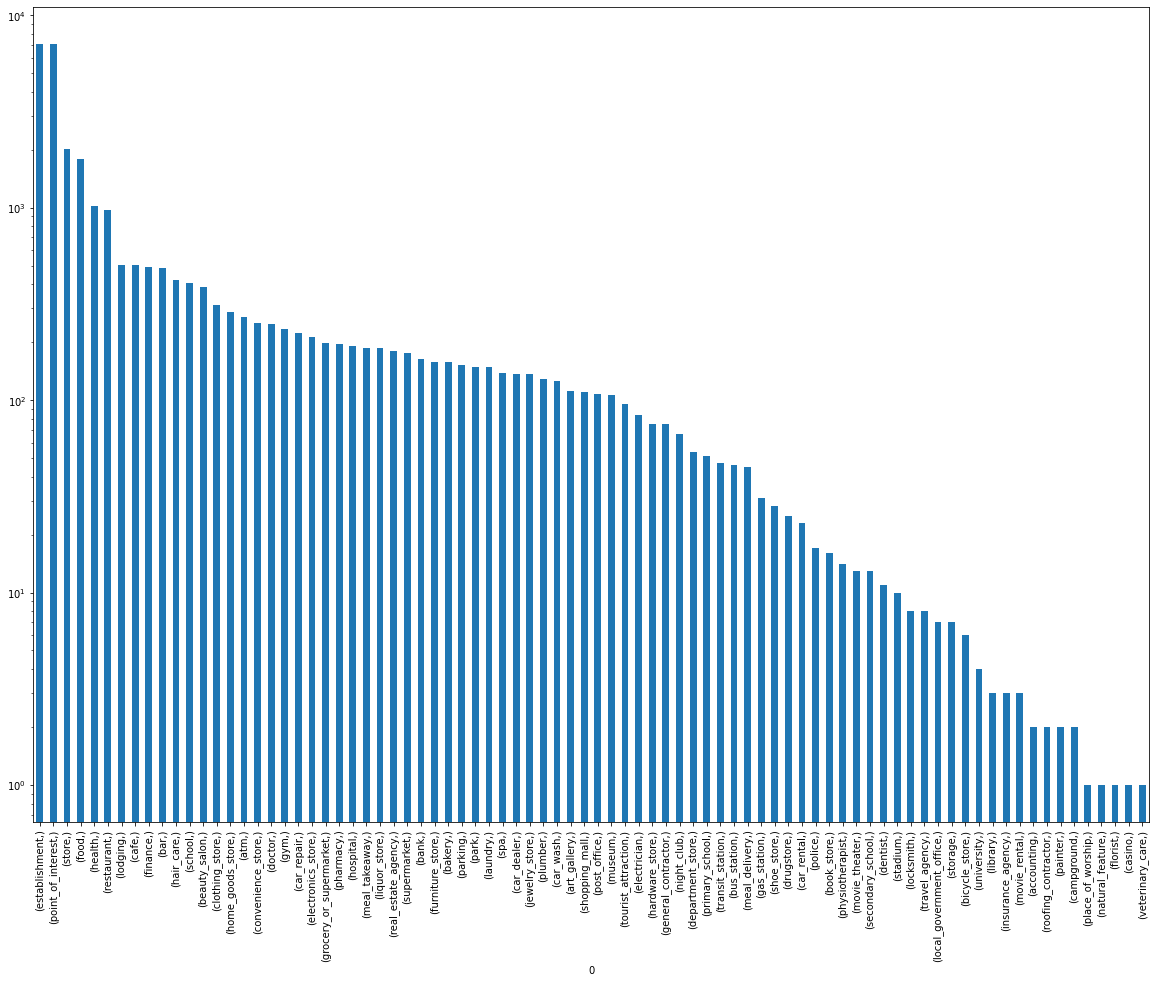

In [30]:
type_in_types_lst_cnt.plot(kind='bar', figsize=(20,15), logy=True);

> There are actually a lot of second ordre places types. Let's remove from types_lst every types which are not in the lst of types used for the api call

In [68]:
test = tmp2_df.copy()

In [124]:
test['order1_types']=test['types'].apply(filter_types_list_according_to_type_order, order=1)
test['order2_types']=test['types'].apply(filter_types_list_according_to_type_order, order=2)
test['nb_order_1'] = test.order1_types.apply(len)
test.reset_index(drop=True, inplace=True)

In [125]:
test['tag'] = test['order1_types'].apply(lambda x: x[0])
for i, row in test[test['nb_order_1']>1].iterrows():
    if len(row['order2_types']) > 0:
        test.loc[i, 'tag'] = row['order2_types'][0]

In [147]:
test.head(10)

,place_id,types,main_type,location,order1_types,order2_types,nb_order_1,tag,discordant_tag
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,"[doctor, health, point_of_interest, establishm...",doctor,"(53.349314, -6.244549)",[doctor],[health],1,doctor,False
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,"[doctor, health, point_of_interest, establishm...",doctor,"(53.34948410000001, -6.244851199999999)",[doctor],[health],1,doctor,False
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,"[doctor, health, point_of_interest, establishm...",doctor,"(53.34951659999999, -6.245638699999999)",[doctor],[health],1,doctor,False
3,ChIJH1OGzY0OZ0gRXtG7NGItip0,"[doctor, health, point_of_interest, establishm...",doctor,"(53.3486877, -6.247086)",[doctor],[health],1,doctor,False
4,ChIJfYGcQO0OZ0gRUo-z2Kk3EG8,"[doctor, health, point_of_interest, establishm...",doctor,"(53.3452321, -6.238953599999999)",[doctor],[health],1,doctor,False
5,ChIJVy5vyZEOZ0gRpdZmPPfkL5I,"[doctor, health, point_of_interest, establishm...",doctor,"(53.34497339999999, -6.249579599999999)",[doctor],[health],1,doctor,False
6,ChIJ8Ug8ivoPZ0gRL8NB99XZaAk,"[doctor, health, point_of_interest, establishm...",doctor,"(53.3449049, -6.2497321)",[doctor],[health],1,doctor,False
7,ChIJ-U6xEL4OZ0gRhqblEyK6kZs,"[dentist, doctor, health, point_of_interest, e...",doctor,"(53.34781400000001, -6.2332589)",[doctor],[health],1,doctor,False
8,ChIJPaoySo8OZ0gR1db2N_DGe_0,"[doctor, health, point_of_interest, establishm...",doctor,"(53.3509807, -6.2539685)",[doctor],[health],1,doctor,False
9,ChIJrbXcYb0PZ0gRwNIQp96aDOE,"[doctor, health, point_of_interest, establishm...",doctor,"(53.3507531, -6.254143)",[doctor],[health],1,doctor,False


In [126]:
test[test.nb_order_1 >1].head(50)

,place_id,types,main_type,location,order1_types,order2_types,nb_order_1,tag
11,ChIJrbJwB5EOZ0gR3YV1ziv7JyY,"[hospital, doctor, health, point_of_interest, ...",doctor,"(53.34329399999999, -6.249631999999999)","[hospital, doctor]",[health],2,health
14,ChIJyx0jUI8OZ0gR-xP8p3qVBbM,"[hospital, doctor, health, point_of_interest, ...",doctor,"(53.35039030000001, -6.255974699999999)","[hospital, doctor]",[health],2,health
15,ChIJP6rA8IUOZ0gRBDsrgw7cc3M,"[pharmacy, doctor, health, point_of_interest, ...",doctor,"(53.3503497, -6.256068200000001)","[pharmacy, doctor]","[health, store]",2,health
24,ChIJz4Z0-YQOZ0gR_FwEGQhY7iA,"[doctor, hospital, health, point_of_interest, ...",doctor,"(53.3480003, -6.259001899999999)","[doctor, hospital]",[health],2,health
28,ChIJr4r1GesOZ0gRtfS6tnKT4qI,"[doctor, hospital, health, point_of_interest, ...",doctor,"(53.33919909999999, -6.2363043)","[doctor, hospital]",[health],2,health
32,ChIJi9XuLoMOZ0gRJOITr8WdqDk,"[hospital, doctor, health, point_of_interest, ...",doctor,"(53.3456655, -6.26457)","[hospital, doctor]",[health],2,health
33,ChIJx2prZuoOZ0gRYpzz1PIPVSo,"[doctor, hospital, health, point_of_interest, ...",doctor,"(53.33732029999999, -6.2339764)","[doctor, hospital]",[health],2,health
34,ChIJt7v9Ip0OZ0gRaDROc-vjsfk,"[hospital, doctor, health, point_of_interest, ...",doctor,"(53.344039, -6.2651859)","[hospital, doctor]",[health],2,health
37,ChIJKUHKNJwOZ0gRv-y2ozKOwQk,"[hospital, doctor, health, point_of_interest, ...",doctor,"(53.3406686, -6.263794499999999)","[hospital, doctor]",[health],2,health
44,ChIJcfNeI4IOZ0gR368q2nO3PtE,"[hospital, doctor, health, point_of_interest, ...",doctor,"(53.34997019999999, -6.2671997)","[hospital, doctor]",[health],2,health


<AxesSubplot:xlabel='tag'>

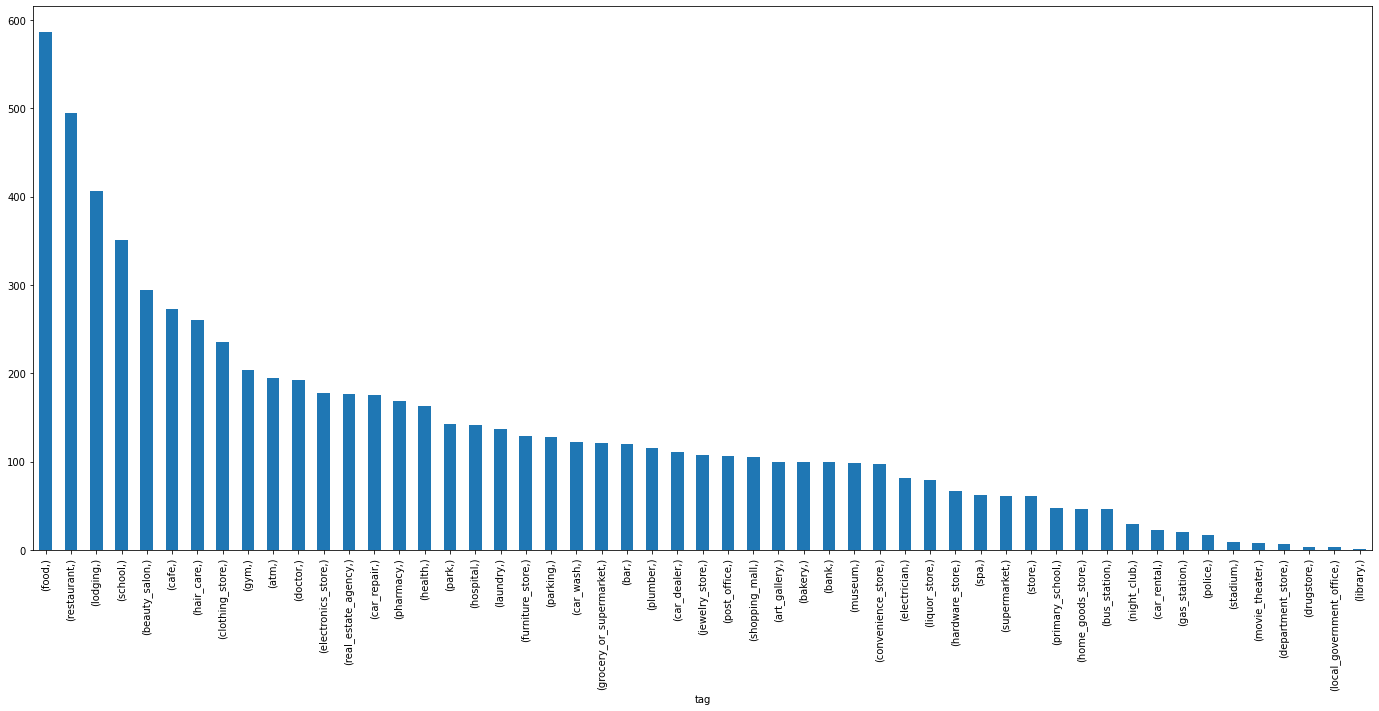

In [151]:
pd.DataFrame(test['tag']).value_counts().plot(kind='bar', figsize = (24,10))

In [158]:
tags_cnt_freq = pd.DataFrame({
    'tags': test['tag'].value_counts(normalize=True).index.tolist(),
    'cnt' : test['tag'].value_counts().values.tolist(),
    'freq' : test['tag'].value_counts(normalize=True).values.tolist()
})
tags_cnt_freq.set_index('tags', inplace=True)
tags_cnt_freq

,cnt,freq
tags,,
food,586,0.082419
restaurant,495,0.069620
lodging,406,0.057103
school,351,0.049367
beauty_salon,294,0.041350
cafe,273,0.038397
hair_care,260,0.036568
clothing_store,235,0.033052
gym,204,0.028692


In [146]:
final_df = clean_duplicated_places(test.copy()[['place_id', 'location','tag']])
final_df.shape

(6616, 3)

In [145]:
test.copy()[['place_id', 'order1_types','tag']]

,place_id,order1_types,tag
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,[doctor],doctor
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,[doctor],doctor
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,[doctor],doctor
3,ChIJH1OGzY0OZ0gRXtG7NGItip0,[doctor],doctor
4,ChIJfYGcQO0OZ0gRUo-z2Kk3EG8,[doctor],doctor
...,...,...,...
7105,ChIJ_Rk7m4QOZ0gRp0X9gUqDZz0,[lodging],lodging
7106,ChIJ9-GHYYMOZ0gRiqwgkceAxSM,[lodging],lodging
7107,ChIJJXl1i4MPZ0gRaLAD3B5Ihuo,[lodging],lodging
7108,ChIJ02R-EBgPZ0gRgJVDsHeyf0k,[lodging],lodging


In [140]:
test.columns

Index(['place_id', 'types', 'main_type', 'location', 'order1_types',
       'order2_types', 'nb_order_1', 'tag', 'discordant_tag'],
      dtype='object')

##### Remove the 2nd order types from the list of types

In [31]:
tmp3_df = tmp2_df.copy()
tmp3_df['clean_types']=tmp3_df['types'].apply(clean_types)
tmp3_df['nb_types']=tmp3_df['clean_types'].apply(len)
tmp3_df.head(3)

,place_id,types,main_type,location,clean_types,nb_types
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,"[doctor, health, point_of_interest, establishm...",doctor,"(53.349314, -6.244549)",[doctor],1
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,"[doctor, health, point_of_interest, establishm...",doctor,"(53.34948410000001, -6.244851199999999)",[doctor],1
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,"[doctor, health, point_of_interest, establishm...",doctor,"(53.34951659999999, -6.245638699999999)",[doctor],1


##### Create a string from the cleaned types

In [36]:
tmp4_df = tmp3_df.copy()
tmp4_df['clean_types_str']=tmp4_df['clean_types'].apply('|'.join)
tmp4_df.head(2)

,place_id,types,main_type,location,clean_types,nb_types,clean_types_str
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,"[doctor, health, point_of_interest, establishm...",doctor,"(53.349314, -6.244549)",[doctor],1,doctor
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,"[doctor, health, point_of_interest, establishm...",doctor,"(53.34948410000001, -6.244851199999999)",[doctor],1,doctor


##### What are the multi types

In [43]:
multitypes_df = tmp4_df[tmp4_df['nb_types'] > 1]
multitypes_df.shape

(1308, 7)

> 1308 places belong to more than one type

In [63]:
multitypes_cnt_freq = pd.DataFrame({
    'clean_types_str': multitypes_df['clean_types_str'].value_counts(normalize=True).index.tolist(),
    'cnt' : multitypes_df['clean_types_str'].value_counts().values.tolist(),
    'freq' : multitypes_df['clean_types_str'].value_counts(normalize=True).values.tolist()
})
multitypes_cnt_freq.set_index('clean_types_str', inplace=True)

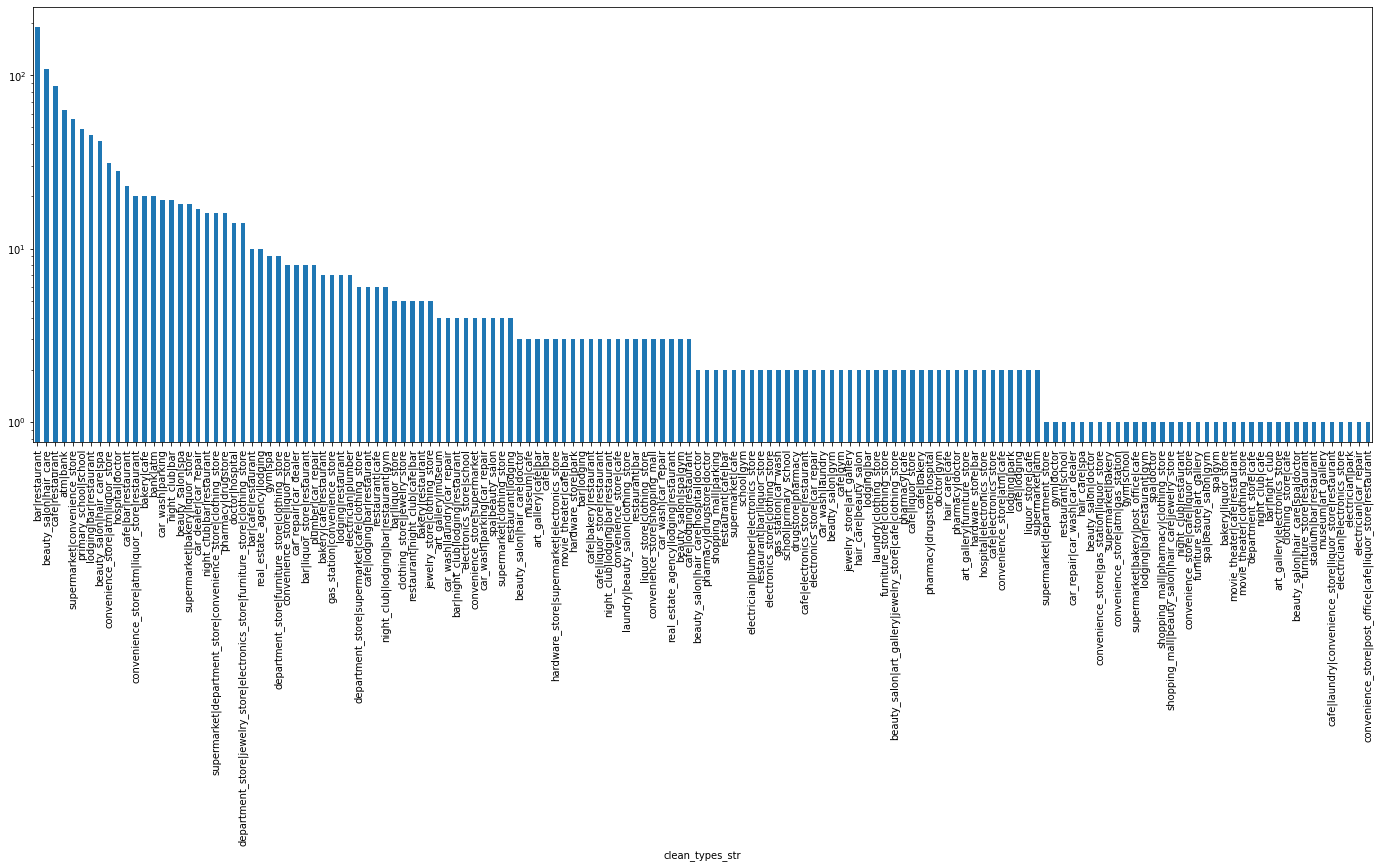

In [64]:
multitypes_cnt_freq['cnt'].plot(kind='bar', figsize=(24,8), logy=True);

> In total there are 150 multitypes tags. We cannot afford to create a counting column for each one of them in the final dataframe. 
<br>We must decide wich one to keep as multi types and the one to transform

In [65]:
multitypes_cnt_freq.head(50)

,cnt,freq
clean_types_str,,
bar|restaurant,191,0.146024
beauty_salon|hair_care,108,0.082569
cafe|restaurant,87,0.066514
atm|bank,63,0.048165
supermarket|convenience_store,56,0.042813
primary_school|school,49,0.037462
lodging|bar|restaurant,45,0.034404
beauty_salon|hair_care|spa,42,0.032110
convenience_store|atm|liquor_store,31,0.023700


In [66]:
singletype_df = tmp4_df[tmp4_df['nb_types'] == 1]

singletype_cnt_freq = pd.DataFrame({
    'clean_types_str': singletype_df['clean_types_str'].value_counts(normalize=True).index.tolist(),
    'cnt' : singletype_df['clean_types_str'].value_counts().values.tolist(),
    'freq' : singletype_df['clean_types_str'].value_counts(normalize=True).values.tolist()
})

In [67]:
singletype_cnt_freq.head(50)

,clean_types_str,cnt,freq
0,restaurant,495,0.085315
1,lodging,402,0.069286
2,school,349,0.060152
3,cafe,273,0.047053
4,hair_care,258,0.044467
5,clothing_store,235,0.040503
6,gym,204,0.035160
7,beauty_salon,196,0.033781
8,doctor,193,0.033264
9,electronics_store,178,0.030679


#### Multi-types places

In [147]:
cnt_types_per_place = pd.DataFrame(no_dupl_api_calls_df.groupby(by='place_id')['main_type'].count())
cnt_types_per_place

,main_type
place_id,
ChIJ--89fUcMZ0gRKpHgPHN294A,1
ChIJ--P6MIMOZ0gR243x1yCU8dQ,1
ChIJ--dZ7SsMZ0gRdXHdkMsh5j0,1
ChIJ--qpRbUPZ0gRShwRIN4naeA,1
ChIJ-063o7cMZ0gRk75T15Noc9E,1
...,...
ChIJzyYNuicMZ0gRqsxMpzXRS98,2
ChIJzybCdrQPZ0gRd1oEiCQ8WME,2
ChIJzyf1y2sMZ0gRX3q-l-PWHhA,1


In [148]:
multi_types_places = cnt_types_per_place[cnt_types_per_place.main_type > 1]
multi_types_places

,main_type
place_id,
ChIJ-0wmlZEPZ0gRLcpWe8d5Vc0,2
ChIJ-1EkjocPZ0gR5Qtap97JYkw,2
ChIJ-3IVHEcNZ0gRAt8IwAvT6QY,2
ChIJ-3WJVIIOZ0gRedlmJyJX5rU,2
ChIJ-3Zy_zYMZ0gRYsVNNGtOzr0,6
...,...
ChIJze_yRYQOZ0gRvxD6X-kFkFc,2
ChIJzeeBPI8OZ0gRQ696vb_3d_A,2
ChIJzwT3zWAPZ0gRYD7AflMBNgU,2


In [149]:
multi_types_places.value_counts()

main_type
2            1074
3             101
4              48
5               9
6               6
dtype: int64

In [153]:
multi_types_places.value_counts().sum()

1238

In [151]:
multitypes_place_id = multi_types_places.index

In [152]:
multitypes_place_id

Index(['ChIJ-0wmlZEPZ0gRLcpWe8d5Vc0', 'ChIJ-1EkjocPZ0gR5Qtap97JYkw',
       'ChIJ-3IVHEcNZ0gRAt8IwAvT6QY', 'ChIJ-3WJVIIOZ0gRedlmJyJX5rU',
       'ChIJ-3Zy_zYMZ0gRYsVNNGtOzr0', 'ChIJ-3cORHQPZ0gRQAN6DtVLDNc',
       'ChIJ-6qO3X0OZ0gR27G3vs5r3ps', 'ChIJ-6qO3X0OZ0gRYkMuqp7g6ok',
       'ChIJ-78OjYgOZ0gRBxnn29oDvh4', 'ChIJ-7T46q4PZ0gRNfGBvxjAuh8',
       ...
       'ChIJzbFxC14OZ0gRTRxoW_5Gygc', 'ChIJzbWQu9UNZ0gRuG1BbN6eOuQ',
       'ChIJzc-KPoQOZ0gRJXSvm80B17o', 'ChIJzcRk17wPZ0gRFdFfHdT5okc',
       'ChIJzcgCHnMPZ0gRy9JDiEjAlDY', 'ChIJze_yRYQOZ0gRvxD6X-kFkFc',
       'ChIJzeeBPI8OZ0gRQ696vb_3d_A', 'ChIJzwT3zWAPZ0gRYD7AflMBNgU',
       'ChIJzyYNuicMZ0gRqsxMpzXRS98', 'ChIJzybCdrQPZ0gRd1oEiCQ8WME'],
      dtype='object', name='place_id', length=1238)

## Data ville de nice

In [1]:
import pandas as pd
import numpy as np

import requests

In [30]:
# code = 60881004
# # url = 'https://geo.api.gouv.fr/communes/{code}'
# # params = {'code':str(code)}

params = {'codePostal':'06300',
         'fields':['surface', 'code']}
url = 'https://geo.api.gouv.fr/communes'



code_insee_nice = "06088"


In [31]:
response = requests.get(url, params=params)

In [33]:
response

<Response [500]>

In [ ]:
code = 60881004
url = 'https://geo.api.gouv.fr/communes/{code}'
params = {'code':'60881004'}

In [34]:
url = 'https://france-cadastre.fr/downloadcenter.php?format=json&echelle=commune&insee=06088&type=parcelles'
response = requests.get(url)

In [36]:
response

<Response [200]>

In [ ]:
# https://france-cadastre.fr/cadastre/nice

## This is a test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

# Display Colonnes Pandas :
pd.set_option('display.max_columns', None)

In [4]:
input_dir = '/home/djampa/code/data_project_lewagon/slcities/slcities/intermediate_data/places_api_call/27-08-2021_00-07-56'

In [5]:
from slcities.get_data import GmapApiCallPreProcessing

In [7]:
api_call_pp = GmapApiCallPreProcessing()
api_call_pp.open_results(input_dir)
api_call_pp.extract_and_format_results()
api_call_pp.filter_results()
# f_path = os.path.join('slcities', 'data', 'places','places.tsv')
# api_call_pp.save_results(f_path, sep='\t', index=False)
print(api_call_pp.return_df())

In [8]:
api_call_pp.return_df()


,place_id,latitude,longitude,place
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,53.349314,-6.244549,doctor
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,53.349484,-6.244851,doctor
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,53.349517,-6.245639,doctor
3,ChIJH1OGzY0OZ0gRXtG7NGItip0,53.348688,-6.247086,doctor
4,ChIJfYGcQO0OZ0gRUo-z2Kk3EG8,53.345232,-6.238954,doctor
...,...,...,...,...
8080,ChIJqSpqySkPZ0gRW6jXEOEb4rc,53.354682,-6.260597,restaurant
8081,ChIJV24hw9MPZ0gRHogAxS58SwI,53.354682,-6.260597,restaurant
8082,ChIJYShEUx8MZ0gRI7biKukUkBs,53.333600,-6.272548,restaurant
8083,ChIJ5bfwW5wOZ0gRbXKmDJcBNG0,53.342281,-6.262912,restaurant


In [18]:
import os
f_path = os.path.join('/home/djampa/code/data_project_lewagon/slcities/slcities/data/places','places.tsv')

In [14]:
f_path

'slcities/data/places/places.tsv'

In [19]:
api_call_pp.save_results(f_path, sep='\t', index=False)

,place_id,types,latitude,longitude,main_type,specific_tag,general_tag,nb_specific_tag,place
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,"[doctor, health, point_of_interest, establishm...",53.349314,-6.244549,doctor,[doctor],[health],1,doctor
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,"[doctor, health, point_of_interest, establishm...",53.349484,-6.244851,doctor,[doctor],[health],1,doctor
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,"[doctor, health, point_of_interest, establishm...",53.349517,-6.245639,doctor,[doctor],[health],1,doctor
3,ChIJH1OGzY0OZ0gRXtG7NGItip0,"[doctor, health, point_of_interest, establishm...",53.348688,-6.247086,doctor,[doctor],[health],1,doctor
4,ChIJfYGcQO0OZ0gRUo-z2Kk3EG8,"[doctor, health, point_of_interest, establishm...",53.345232,-6.238954,doctor,[doctor],[health],1,doctor
...,...,...,...,...,...,...,...,...,...
11025,ChIJ5bfwW5wOZ0gRbXKmDJcBNG0,"[restaurant, food, point_of_interest, establis...",53.342281,-6.262912,restaurant,[restaurant],[food],1,restaurant
11026,ChIJwWaz2ZkOZ0gRY3HxIivzamM,"[restaurant, food, point_of_interest, establis...",53.338774,-6.252623,restaurant,[restaurant],[food],1,restaurant
11027,ChIJMUad35kOZ0gRe4n6cOCJH9c,"[restaurant, food, point_of_interest, establis...",53.338788,-6.252642,restaurant,[restaurant],[food],1,restaurant
11028,ChIJwWaz2ZkOZ0gRimydVTwK0xA,"[restaurant, food, point_of_interest, establis...",53.338394,-6.253002,restaurant,[restaurant],[food],1,restaurant


In [11]:
api_call_pp.filter_results()

In [12]:
filtered_df = api_call_pp.return_df()
filtered_df.head()

,place_id,latitude,longitude,place
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,53.349314,-6.244549,doctor
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,53.349484,-6.244851,doctor
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,53.349517,-6.245639,doctor
3,ChIJH1OGzY0OZ0gRXtG7NGItip0,53.348688,-6.247086,doctor
4,ChIJfYGcQO0OZ0gRUo-z2Kk3EG8,53.345232,-6.238954,doctor


In [19]:
draft_df = api_call_pp.return_df()

In [20]:
draft_df.head()

,place_id,types,geometry.location.lat,geometry.location.lng,main_type
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,doctor|health|point_of_interest|establishment,53.349314,-6.244549,doctor
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,doctor|health|point_of_interest|establishment,53.349484,-6.244851,doctor
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,doctor|health|point_of_interest|establishment,53.349517,-6.245639,doctor
3,ChIJH1OGzY0OZ0gRXtG7NGItip0,doctor|health|point_of_interest|establishment,53.348688,-6.247086,doctor
4,ChIJfYGcQO0OZ0gRUo-z2Kk3EG8,doctor|health|point_of_interest|establishment,53.345232,-6.238954,doctor


In [21]:
api_call_pp.extract_information()
# formated_df = api_call_pp.return_df()

In [22]:
formated_df = api_call_pp.return_df()
formated_df.head()

,place_id,types,geometry.location.lat,geometry.location.lng,main_type,specific_tag,general_tag,nb_specific_tag,tag
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,"[doctor, health, point_of_interest, establishm...",53.349314,-6.244549,doctor,[doctor],[health],1,doctor
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,"[doctor, health, point_of_interest, establishm...",53.349484,-6.244851,doctor,[doctor],[health],1,doctor
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,"[doctor, health, point_of_interest, establishm...",53.349517,-6.245639,doctor,[doctor],[health],1,doctor
3,ChIJH1OGzY0OZ0gRXtG7NGItip0,"[doctor, health, point_of_interest, establishm...",53.348688,-6.247086,doctor,[doctor],[health],1,doctor
4,ChIJfYGcQO0OZ0gRUo-z2Kk3EG8,"[doctor, health, point_of_interest, establishm...",53.345232,-6.238954,doctor,[doctor],[health],1,doctor


In [24]:
api_call_pp.filter_results()

In [25]:
filtered_df = api_call_pp.return_df()

In [26]:
filtered_df.head()

,place_id,geometry.location.lat,geometry.location.lng,tag
0,ChIJEz-hVowOZ0gRUzIA23OzlnI,53.349314,-6.244549,doctor
1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,53.349484,-6.244851,doctor
2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,53.349517,-6.245639,doctor
3,ChIJH1OGzY0OZ0gRXtG7NGItip0,53.348688,-6.247086,doctor
4,ChIJfYGcQO0OZ0gRUo-z2Kk3EG8,53.345232,-6.238954,doctor


In [28]:
filtered_df.shape

(10090, 4)

In [31]:
len(np.unique(filtered_df.place_id))

8084

In [35]:
duplicateRowsDF = filtered_df[filtered_df.place_id.duplicated()]

In [36]:
duplicateRowsDF

,place_id,geometry.location.lat,geometry.location.lng,tag
507,ChIJt7v9Ip0OZ0gRaDROc-vjsfk,53.344039,-6.265186,health
512,ChIJi9XuLoMOZ0gRJOITr8WdqDk,53.345666,-6.264570,health
744,ChIJ2eU1xvsPZ0gR5hlAl5DpJzs,53.351950,-6.251671,park
745,ChIJl7iKN8cPZ0gREtaKF_ynX8Y,53.353299,-6.256006,park
746,ChIJ3RikV30OZ0gRdGnOXe9xpAM,53.356635,-6.257447,park
...,...,...,...,...
10079,ChIJuXZqZ4YOZ0gR0wc87d26J8Q,53.352304,-6.258918,restaurant
10080,ChIJ0yYUH-UPZ0gRsfP1tjVQ0FY,53.350153,-6.257812,restaurant
10086,ChIJwWaz2ZkOZ0gRY3HxIivzamM,53.338774,-6.252623,restaurant
10088,ChIJwWaz2ZkOZ0gRimydVTwK0xA,53.338394,-6.253002,restaurant


In [38]:
sorted_duplicateRowsDF = duplicateRowsDF.sort_values(by='place_id')

In [39]:
sorted_duplicateRowsDF.head()

,place_id,geometry.location.lat,geometry.location.lng,tag
1954,ChIJ-0wmlZEPZ0gRLcpWe8d5Vc0,53.357634,-6.263383,liquor_store
2777,ChIJ-1EkjocPZ0gR5Qtap97JYkw,53.364703,-6.271358,liquor_store
8394,ChIJ-1e7rSMMZ0gRJ-DzVD4w6fI,53.336743,-6.276133,school
8165,ChIJ-1jnsacOZ0gRiZTuJsk6Uoo,53.324920,-6.280160,plumber
7776,ChIJ-29gdZwOZ0gRn7abFuB7sY4,53.341507,-6.260406,hair_care


In [41]:
sorted_duplicateRowsDF.place_id.dtypes

dtype('O')

In [44]:
filtered_df[filtered_df.duplicated(subset=['geometry.location.lat',	'geometry.location.lng'])].sort_values(by=['geometry.location.lat',	'geometry.location.lng'])

,place_id,geometry.location.lat,geometry.location.lng,tag
9652,ChIJT9_53LkOZ0gRK_jQX6Cq92I,53.325478,-6.241563,school
3998,ChIJzxnSZE4NZ0gRhZ8cQK2IeyE,53.327323,-6.337284,car_repair
7468,ChIJJyo5EWYMZ0gR7wYnb557hVs,53.327709,-6.307637,bank
7297,ChIJNUh89GgMZ0gRjRcjU2FHt50,53.329290,-6.304801,gym
9036,ChIJZ9yXqlENZ0gRHeoGZlOQHAU,53.329365,-6.299127,shopping_mall
...,...,...,...,...
9902,ChIJPxe1gZUNZ0gR9n4VbW3D8cc,53.375704,-6.307071,bank
6822,ChIJZ_eZercNZ0gR_NrFC9eMKbc,53.375704,-6.307071,car_dealer
7564,ChIJI-aZAN4NZ0gRWQMYKjN-fe0,53.376762,-6.282355,plumber
5561,ChIJRVz5rD8OZ0gR00V9eouY7h4,53.381333,-6.245526,beauty_salon


In [60]:
machin = filtered_df.convert_dtypes()

In [61]:
machin.dtypes

place_id                  string
geometry.location.lat    Float64
geometry.location.lng    Float64
tag                       string
dtype: object

In [58]:
machin.place_id.value_counts()

ChIJfXy-pIQOZ0gRkRkQidQRrYE    5
ChIJJVkiPPQOZ0gR0M0CZ3GyHec    4
ChIJQVmzMREPZ0gR_PA8RPN66WU    4
ChIJSWG3sy8MZ0gRX7yQV0c1kqs    4
ChIJKUWQZLkNZ0gREWZVazE-Nwo    4
                              ..
ChIJH9cZq9MNZ0gROSxPDk75jrc    1
ChIJH9cZq9MNZ0gRqEWnjFiBGZA    1
ChIJk6BiqNMNZ0gRg5yuOdOcMEM    1
ChIJ48VE-dANZ0gRD6wBHLJpQPk    1
ChIJMUad35kOZ0gRe4n6cOCJH9c    1
Name: place_id, Length: 8084, dtype: int64

In [68]:
machin[machin.place_id == 'ChIJfXy-pIQOZ0gRkRkQidQRrYE']

,place_id,geometry.location.lat,geometry.location.lng,tag
1397,ChIJfXy-pIQOZ0gRkRkQidQRrYE,53.346396,-6.260311,laundry
1566,ChIJfXy-pIQOZ0gRkRkQidQRrYE,53.346414,-6.260739,laundry
3232,ChIJfXy-pIQOZ0gRkRkQidQRrYE,53.346396,-6.260311,laundry
5310,ChIJfXy-pIQOZ0gRkRkQidQRrYE,53.346414,-6.260739,laundry
7678,ChIJfXy-pIQOZ0gRkRkQidQRrYE,53.346571,-6.260677,laundry


In [69]:
machin[machin.place_id == 'ChIJJVkiPPQOZ0gR0M0CZ3GyHec']

,place_id,geometry.location.lat,geometry.location.lng,tag
1398,ChIJJVkiPPQOZ0gR0M0CZ3GyHec,53.353765,-6.236353,laundry
1574,ChIJJVkiPPQOZ0gR0M0CZ3GyHec,53.353765,-6.236353,laundry
4300,ChIJJVkiPPQOZ0gR0M0CZ3GyHec,53.353765,-6.236353,laundry
7962,ChIJJVkiPPQOZ0gR0M0CZ3GyHec,53.353765,-6.236353,laundry


In [70]:
machin[machin.place_id == 'ChIJKUWQZLkNZ0gREWZVazE-Nwo']

,place_id,geometry.location.lat,geometry.location.lng,tag
196,ChIJKUWQZLkNZ0gREWZVazE-Nwo,53.347094,-6.280022,restaurant
6982,ChIJKUWQZLkNZ0gREWZVazE-Nwo,53.347095,-6.280024,restaurant
7579,ChIJKUWQZLkNZ0gREWZVazE-Nwo,53.347095,-6.280024,restaurant
7673,ChIJKUWQZLkNZ0gREWZVazE-Nwo,53.347094,-6.280022,restaurant


In [71]:
machin.drop_duplicates(subset=['place_id', 'tag']).shape

(8085, 4)

TypeError: no numeric data to plot

## test maps 

In [16]:
from slcities.map import MapsVisualisation
from slcities.params import DUBLIN_CENTER_COORDS

import folium

In [17]:
m = MapsVisualisation()
tiles_url = 'https://server.arcgisonline.com/arcgis/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{z}/{y}/{x}'
truc = m.initialise_map(
    'truc',
    tiles_url,
    center_lat=DUBLIN_CENTER_COORDS[0],
    center_lon=DUBLIN_CENTER_COORDS[1]
)

In [19]:
display(truc)